
1. Build a CNN model 
2. Train the model
3. Assess model performance

Looks like a three-step process but it will be more.

## Model building
With reference to the research paper, we will refer to this section frequently:




In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers.normalization import BatchNormalization
from keras import models, optimizers
from sklearn.metrics import confusion_matrix

In [3]:
import keras

As mentioned, TeaNet is based on the AlexNet architecture. 

To make your time building TeaNet easier, why not start from AlexNet and then start modifying? 

Very useful resource if you don't know how to create your CNN layers from scratch: https://analyticsindiamag.com/hands-on-guide-to-implementing-alexnet-with-keras-for-multi-class-image-classification/
 

In [4]:
# Step 2: Implement the original AlexNet
#Instantiation
AlexNet = models.Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_2 (Activation)    (None, 4, 4, 256)        

### Step 3: Modify AlexNet and turn it into TeaNet
Now that you've successfully implemented AlexNet, time to modify the parameters according to the publication. 

We'll tweak it to ask close as it's needed to TeaNet (plus a bit of our own modification):

<strong>More specifically, to turn AlexNet into TeaNet, you will need to:</strong>
1. Change the input_shape parameter in first layer
2. Change the filter sizes in each layer to match the publication
3. Remove 'padding' parameter in all layers
4. Change the drop out ratio
5. Completely remove the # Output Layer
6. In the 3rd fully connected layer:
    - Change the number of neurons in the third fully connected layer from 1000 to 3
    - Change the activation from 'relu' to 'softmax'
    - Remove the dropout operation
7. Change the compile parameters
    - Change the optimizer from adam to optimizers.SGD with a learning rate of 0.01, and momentum of 0.9
    
At the model summary, see if your parameters look like this:
```
Total params: 239,567
Trainable params: 237,833
Non-trainable params: 1,734
```

You're on the right track.

In [23]:
# Step 3: Modify AlexNet to TeaNet
#Instantiation
Alex = models.Sequential()

#1st Convolutional Layer
Alex.add(Conv2D(filters=32, input_shape=(150,150,3), kernel_size=(11,11), strides=(4,4)))
Alex.add(BatchNormalization())
Alex.add(Activation('relu'))
Alex.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

#2nd Convolutional Layer
Alex.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1)))
Alex.add(BatchNormalization())
Alex.add(Activation('relu'))
Alex.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#3rd Convolutional Layer
Alex.add(Conv2D(filters=128, kernel_size=(3,3), strides=(3,3)))
Alex.add(BatchNormalization())
Alex.add(Activation('relu'))
Alex.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Passing it to a Fully Connected layer
Alex.add(Flatten())
# 1st Fully Connected Layer
Alex.add(Dense(512, input_shape=(150,150,3,)))
Alex.add(BatchNormalization())
Alex.add(Activation('relu'))
# Add Dropout to prevent overfitting
Alex.add(Dropout(0.5))

#2nd Fully Connected Layer
Alex.add(Dense(128))
Alex.add(BatchNormalization())
Alex.add(Activation('relu'))
#Add Dropout
Alex.add(Dropout(0.5))

#3rd Fully Connected Layer
Alex.add(Dense(3))
Alex.add(BatchNormalization())
Alex.add(Activation('softmax'))

#Model Summary
Alex.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 35, 35, 32)        11648     
_________________________________________________________________
batch_normalization_22 (Batc (None, 35, 35, 32)        128       
_________________________________________________________________
activation_22 (Activation)   (None, 35, 35, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_23 (Batc (None, 15, 15, 64)        256       
_________________________________________________________________
activation_23 (Activation)   (None, 15, 15, 64)       

In [24]:
# Compiling the model
Alex.compile(loss = keras.losses.categorical_crossentropy, optimizer= optimizers.SGD(lr=0.001, momentum=0.9), metrics=['accuracy'])

## Preparing your images
We haven't set our training, validation, and test data yet so we can't train. 

### Step 4: Define the classes
Declare a variable, and assign it with a dictionary with the following key-value pair:
1. 'underfermented tea' - 0
2. 'overfermented tea' - 1
3. 'fermented tea' - 2

The reason why we do this is that sometimes model training on Keras can lead the classes being mixed up. As such, it's better to explicitly declare what our classes and its corresponding values are. 

In [25]:
# Step 4: Declare your classes
d = {'underfermented tea':0, 'overfermented tea':1, 'fermented tea':2}
print(d)

{'underfermented tea': 0, 'overfermented tea': 1, 'fermented tea': 2}


### Step 5: Create ImageDataGenerator objects
We will be generating batches of augmented image data during model training, so we will be creating ImageDataGenerator objects. 

Handy reading: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Declare three variables, and assign them ImageDataGenerator objects with the following parameters
1. train generator
    - rescale - 1.0/255
    - shear_range - 0.2
    - zoom_range - 0.2
    - horizontal_flip - True
2. test generator
    - rescale - 1.0/255
3. val generator
    - rescale - 1.0/255

In [26]:
traingen = ImageDataGenerator(shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, rescale = 1.0/255)
testgen = ImageDataGenerator(rescale = 1.0/255)
valgen = ImageDataGenerator(rescale = 1.0/255)

### Step 6: Declare your train/val/test folder paths
Declare three variables, and assign them the path to your train, val, and test folders. 

Navigate to the folders that you got from Part II Step 6, and copy the path.

In [27]:
# Step 6: Store the path to variables
train_path = 'Black tea fermentation dataset/output/train'
val_path = 'Black tea fermentation dataset/output/val'
test_path = 'Black tea fermentation dataset/output/test'

### Declare your train/validation/test .flow_from_directory


In [28]:
# Step 7: Declare your .flow_from_directory variables
train = traingen.flow_from_directory(directory=train_path, target_size=(150,150), classes=d, class_mode='categorical', batch_size=16)
val = valgen.flow_from_directory(directory=val_path, target_size=(150,150), classes=d, class_mode='categorical', batch_size=16, shuffle=False)
test = testgen.flow_from_directory(directory=test_path, target_size=(150,150), classes=d, class_mode='categorical', batch_size=16, shuffle=False)

Found 4800 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 601 images belonging to 3 classes.


## Model training and assessment


In [29]:
# Step 8: Train your model
history = Alex.fit(train, steps_per_epoch=20, epochs=20, verbose=1, validation_data=val)

Epoch 1/20
20/20 [==============================] - 8s 416ms/step - loss: 0.9354 - accuracy: 0.5875 - val_loss: 1.0011 - val_accuracy: 0.3333
Epoch 2/20
20/20 [==============================] - 5s 274ms/step - loss: 0.4312 - accuracy: 0.9531 - val_loss: 0.9712 - val_accuracy: 0.3333
Epoch 3/20
20/20 [==============================] - 5s 269ms/step - loss: 0.3370 - accuracy: 0.9937 - val_loss: 0.9914 - val_accuracy: 0.6683
Epoch 4/20
20/20 [==============================] - 6s 275ms/step - loss: 0.3089 - accuracy: 0.9969 - val_loss: 0.9818 - val_accuracy: 1.0000
Epoch 5/20
20/20 [==============================] - 6s 292ms/step - loss: 0.3235 - accuracy: 0.9906 - val_loss: 1.0004 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 5s 270ms/step - loss: 0.2948 - accuracy: 0.9937 - val_loss: 0.9987 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 5s 265ms/step - loss: 0.2805 - accuracy: 1.0000 - val_loss: 0.9680 - val_accuracy: 1.0000
Epoch 

### Make predictions using test set

In [31]:
# Step 9: Make predictions using your test set
x = Alex.predict(test)

In [34]:
x

array([[0.7225481 , 0.14641587, 0.13103595],
       [0.7225481 , 0.14641587, 0.13103595],
       [0.7225481 , 0.14641587, 0.13103595],
       ...,
       [0.1645663 , 0.24178176, 0.59365195],
       [0.1645663 , 0.24178176, 0.59365195],
       [0.1645663 , 0.24178176, 0.59365195]], dtype=float32)

### Get the index of maximum value in each prediction array

In [35]:
y_pred = np.argmax(x, axis=1)

In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Confusion matrix

In [40]:
# Step 11: Print a confusion matrix
y_true = test.classes

In [41]:
class_names=['underfermented', 'overfermented', 'fermented']

In [43]:
confusion_mtx=confusion_matrix(y_true,y_pred)

In [45]:
confusion_mtx

array([[200,   0,   0],
       [  0, 200,   0],
       [  0,   0, 201]], dtype=int64)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

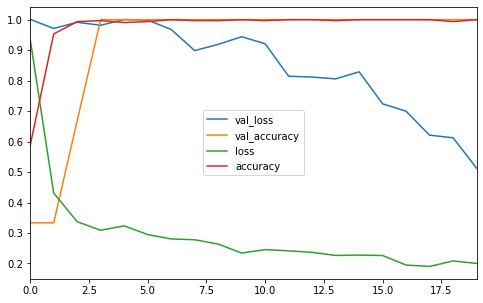

In [50]:
# Step 12: Plot your accuracy and val plots
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### End of Part III
That was long, wasn't it? But based on the results from Step 11 and Step 12, we would say it's well worth it. 

If you carried everything out well so far, congratulations! 

You're theoretically supposed to train a model that can predict 100% the state of fermentation of the leave based on image data alone. 

If you haven't, it's a good time to go back and revisit steps that you might have executed wrongly. 

Otherwise, let's head on to Parts IV and V where we will take a step back and return to our machine learning roots.